# DATA ANALYSIS ON PEW RESEARCH DATA- GAMING, JOBS AND BROADBAND


<p style = 'color:blue'> The data has been loaded into a dataframe from the provided CSV file.<br>The source of the data is <p style ='color:green'>
http://www.pewinternet.org/datasets/<p>  </p>

In [12]:
library(dplyr)
library(ggplot2)
pew_df <- read.csv(file="pew_data.csv",head=TRUE,sep=",")

In [13]:
head(pew_df)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


### q1) Is there any relation between family income and number of children ?

<p style = "color:purple">The data is filtered by first choosing observations in which the adult is a parent of kids under the age of 18. It is also filtered by choosing the valid number of children from the kid related variables (ignoring the responses like- refused to answer).There are 9 valid categories of income and 7 valid categories of race. New variable - count of children is inserted and the required data is selected. The categories are factorised for plotting the data </p>

In [14]:
#Do the variables number of kids and family income have any dependency?
q1_df <- filter(pew_df, par==1 , kidage1 < 5 , kidage2 < 5 , kidage3 < 5,inc <= 9,race < 8) %>% mutate(inc,num_of_kids=kidage1+kidage2+kidage3) %>% select(inc,num_of_kids,race) 
head(q1_df,n=10)

inc,num_of_kids,race
4,2,2
2,6,5
7,2,2
6,4,1
8,2,1
4,1,1
8,2,1
7,1,1
5,5,1
9,2,3


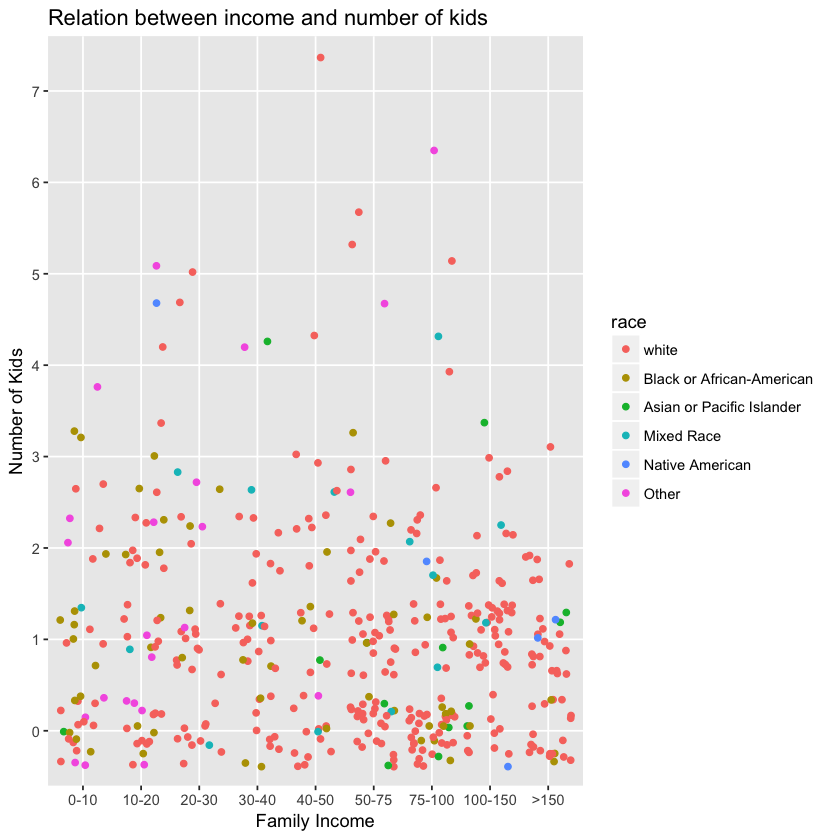

In [24]:
q1_df <- within(q1_df, race<- factor(race, labels = c("white","Black or African-American","Asian or Pacific Islander","Mixed Race","Native American","Other")))
q1_df <- within(q1_df, inc<- factor(inc, labels = c("0-10", "10-20","20-30","30-40","40-50","50-75","75-100","100-150",">150")))
qplot( inc,num_of_kids, data=q1_df, geom="jitter",xlab="Family Income",color=race,ylab="Number of Kids",main="Relation between income and number of kids")
            

In [16]:
write.csv(q1_df, file = "q1_df.csv",row.names=FALSE, na="")

<p style = "color:green"> From the data, it can be seen that the middle income population tend to have more number of kids and higher income population(more than 75k usd) seems to have less children(3 or less) <p style ="color:blue"> Race doesn't appear to have any relation with number of kids</p> </p>

### q2) Is age a factor in determining the frequency of internet usage among the surveyed population? Are teenagers are more active on internet? Let's see..

<p style = "color:purple"> The required fields with valid data is first filtered and selected. A density plot is plotted </p>

In [17]:
q2_df <- filter(pew_df, intfreq<=5 ,age < 98)  %>% select(age,sex,intfreq) 




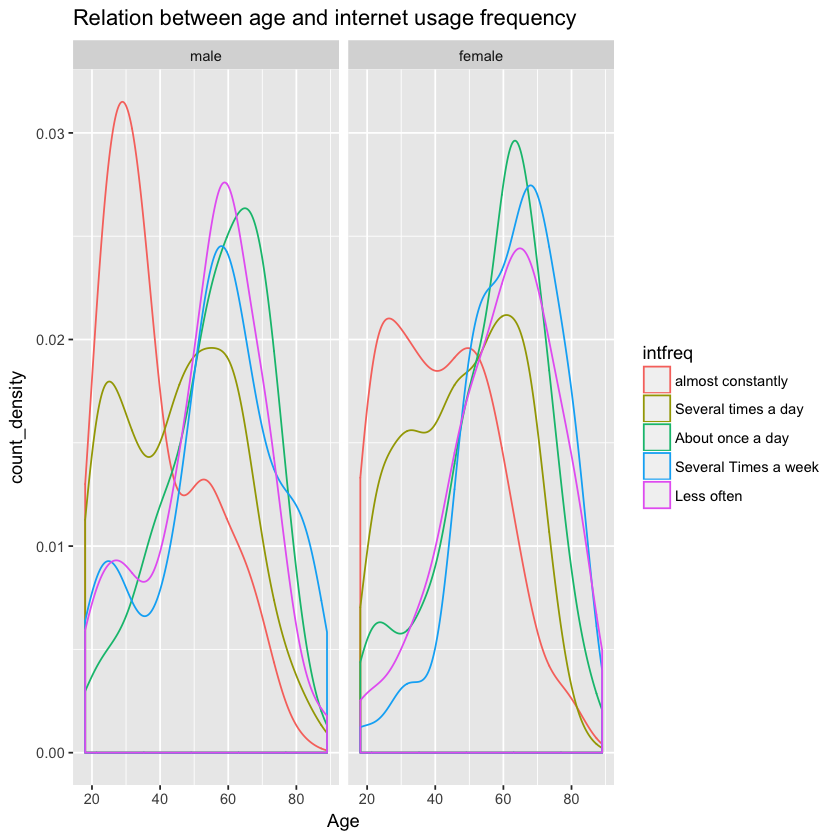

In [211]:
q2_df <- within(q2_df, intfreq <- factor(intfreq, labels = c("almost constantly","Several times a day","About once a day","Several Times a week","Less often")))
q2_df <- within(q2_df,sex <- factor(sex, labels = c("male","female")))
qplot(age, data=q2_df , geom="density", facets = . ~ sex, color = intfreq ,xlab = "Age",ylab ="count_density",main = "Relation between age and internet usage frequency")
write.csv(q2_df, file = "q2_df.csv",row.names=FALSE, na="")

<p style ="color:green ">As expected, the people of ages around 20-35 in both genders are more likely to have higher internet usage and people of age>60 use internet less often</p>
<p style = "color:blue "> The plots indicate that the internet usage frequency patterns depend more on age groups rather than gender </p>

### q3) Is there a dependency between race, age, sex and political leaning? Can the demographic data be used in determining presidential election win?

<p style = "color:purple"> The fields age, race and party leaning are filtered to get relevant and valid data. The age field is converted into categories.The alpha argument is used to alleviate the overplotting seen in plot </p>

In [49]:
q3_df <- filter(pew_df, race < 8 ,age < 98, party < 4)  %>% mutate(age_category =cut(age,seq(0,100,20))) %>% select(age,age_category,sex,race,party) 



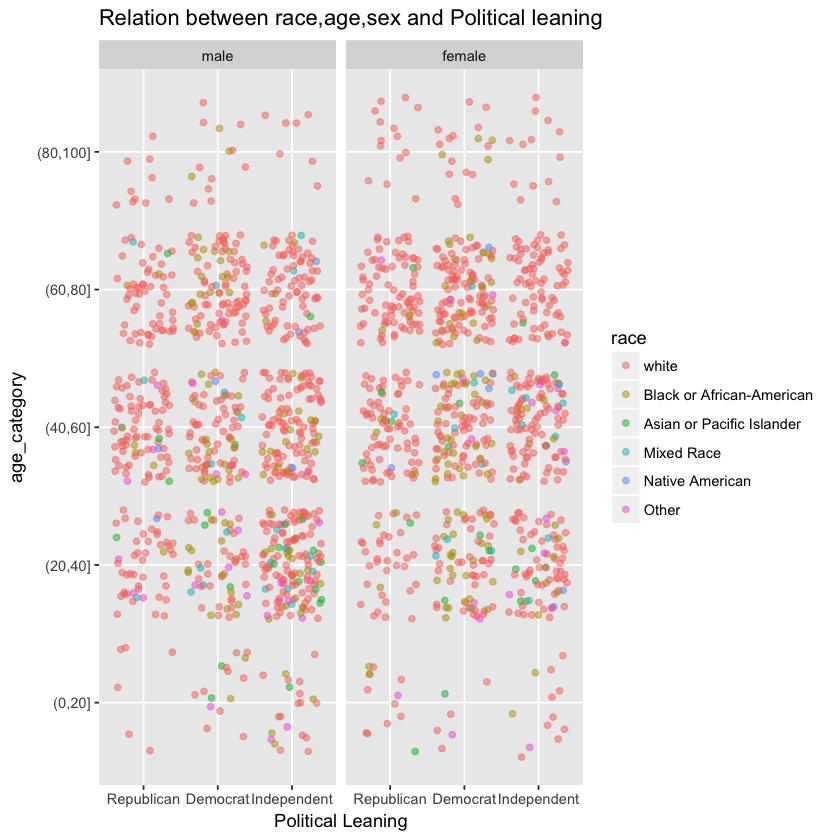

In [212]:
q3_df <- within(q3_df, party <- factor(party, labels = c("Republican","Democrat","Independent")))
q3_df <- within(q3_df, race<- factor(race, labels = c("white","Black or African-American","Asian or Pacific Islander","Mixed Race","Native American","Other")))
q3_df <- within(q3_df,sex<-factor(sex, labels =c("male","female")))
qplot(party, age_category , data=q3_df , geom="jitter", facets = . ~ sex, color = race,xlab = "Political Leaning",ylab ="age_category",main = "Relation between race,age,sex and Political leaning", alpha = I(1 / 2))
write.csv(q3_df, file = "q3_df.csv",row.names=FALSE, na="")

<p style ="color:green "> A lot of young people of both sexes politically lean towards democratic party and Independent candidates. For this data, a lot of people are affiliated to democrats and independent parties </p>
<p style ="color:blue "> The majority voter base for Republicans appears clearly to be white population  compared to other races. African American voters of both sexes(second largest voter base) seem to be strong supporter of democrats.This also seems to be the case for Asian origin population and other minority races.<br> But the plot clearly doesn't help in predicting the presidential election win right way</p>

### q4) People of what age and which sex are more likely to use online dating sites? Males of age around 25 may be the majority. Let's see...

<p style ="color:purple "> The variables age , sex and dating site use variable - date1a(Have YOU, personally, ever used an online dating site such as Match.com, eHarmony, or OK Cupid? ) are selected with valid data <br> The count values were converted into percentage values for clear interpretation of data and it is plotted using GGplot package for men and women</p>

In [125]:
q4_df <- filter(pew_df, age < 98, date1a < 3)  %>% mutate(age_category =cut(age,seq(0,100,10))) %>% select(age,age_category,sex,date1a) 


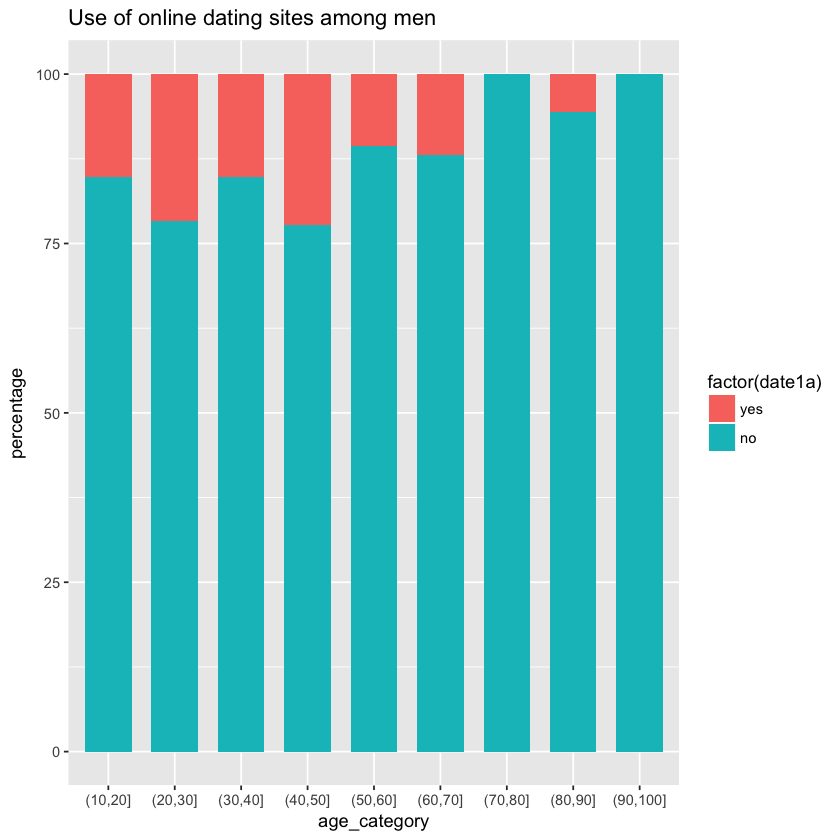

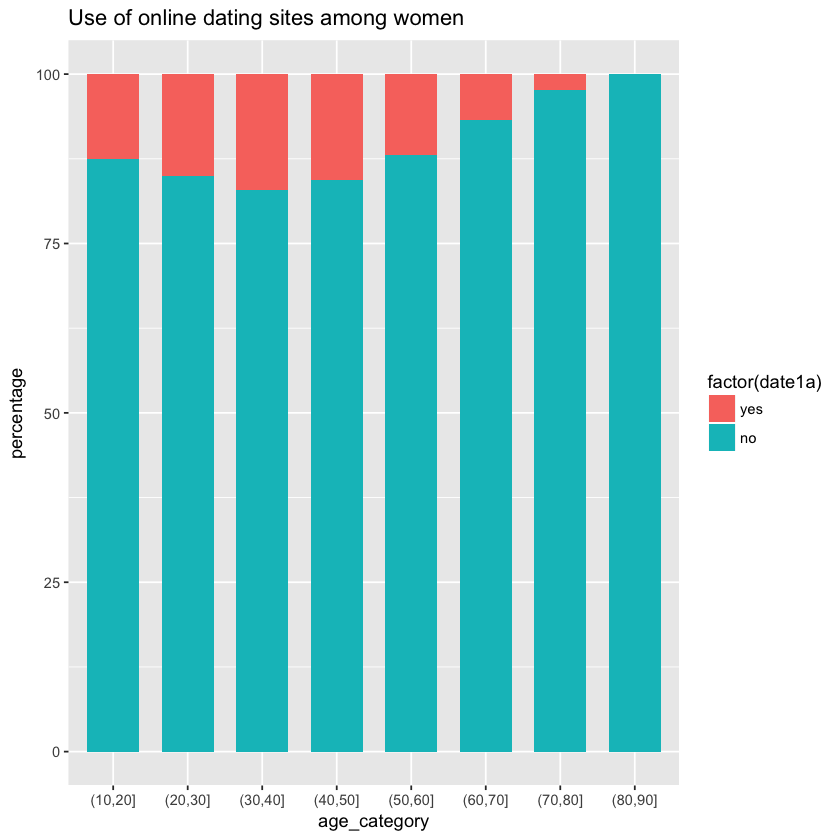

In [210]:
q4_df <- within(q4_df, date1a <- factor(date1a, labels = c("yes","no")))
q4_df <- within(q4_df, sex <- factor(sex, labels = c("male","female")))
#male plot
q4_male_plot <- q4_df %>% filter(sex=="male") %>%group_by(age_category,date1a) %>% summarise(count=n()) %>% mutate(perc=count/sum(count))

library(scales)
p4_male <- ggplot(q4_male_plot, aes(x = factor(age_category), y = perc *100, fill = factor(date1a))) + geom_bar(stat="identity",width=0.7) + labs(x="age_category",y="percentage") + ggtitle("Use of online dating sites among men")
#female plot
q4_fem_plot <- q4_df %>% filter(sex=="female") %>%group_by(age_category,date1a) %>%  summarise(count=n()) %>% mutate(perc=count/sum(count))

p4_fem <- ggplot(q4_fem_plot, aes(x = factor(age_category), y = perc *100, fill = factor(date1a))) + geom_bar(stat="identity",width=0.7) + labs(x="age_category",y="percentage") + ggtitle("Use of online dating sites among women")

p4_male
p4_fem

write.csv(q4_df, file = "q4_df.csv",row.names=FALSE, na="")


<p style ="color:green "> As expected, Men in age group 20 to 30 are the majority who use online dating sites across all dating sites.Surprisingly,so is the case with men in age group 40 to 50. Women in age range 30-40 are the majority group in the women composition plot</p> 
<p style="color:blue"> It can also be inferred that young users are avid users of online dating sites </p>

### q5) Which agegroup  thinks that smartphones are important in job search? Is there any relation with educational qualifications?

<p style="color:purple"> Age has been divided into 10 categories and valid data from each field has been selected. Jitter plot has been used for analyzing 3 variables at a  time</p>

In [191]:
q5_df <- filter(pew_df, educ2 < 9,age < 98, smjob3 < 5)  %>% mutate(age_category =cut(age,seq(0,100,10))) %>% select(age,age_category,educ2,smjob3) 



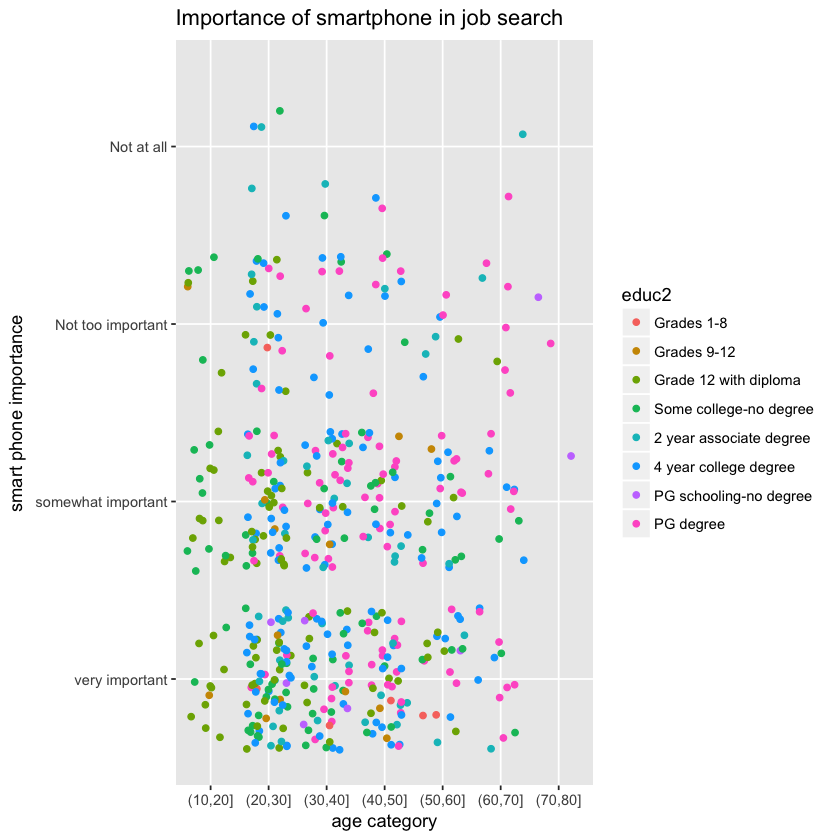

In [209]:
q5_df <- within(q5_df, educ2 <- factor(educ2, labels = c("Grades 1-8","Grades 9-12","Grade 12 with diploma","Some college-no degree","2 year associate degree","4 year college degree","PG schooling-no degree","PG degree")))
q5_df <- within(q5_df, smjob3 <- factor(smjob3, labels=c("very important","somewhat important","Not too important","Not at all")))

qplot(age_category, smjob3, data=q5_df, geom=c( "jitter"),color=educ2 
   , main="Importance of smartphone in job search",
   xlab="age category", ylab="smart phone importance")
write.csv(q5_df, file = "q5_df.csv",row.names=FALSE, na="")

<p style = "color:green"> The tech savvy generation which belongs to the age groups 20 to 30 and 30 to 40 are unsurprisingly the majority group who think that the smartphones are very important for job search.</p>
<p style="color:blue"> When it comes to educational qualifications, the people with 4 year college degree and PG degree are the ones who use smartphone as important resource for job search</p>